In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Function for data preparation

In [299]:
def prepare_dataset(df_curr,df_pow,df_ener):
    df_curr.columns=['Datetime','Current']
    df_ener.columns=['Datetime','Energy']
    df_pow.columns=['Datetime','Power']
    df_pow['Datetime'] = pd.to_datetime(df_pow.Datetime,unit='ms')
    df_ener['Datetime'] = pd.to_datetime(df_ener.Datetime,unit='ms')
    df_curr['Datetime'] = pd.to_datetime(df_curr.Datetime,unit='ms')
    df=pd.merge(df_curr,df_pow, on='Datetime')
    df = pd.merge(df,df_ener, on='Datetime')
    
    #Generating dataframe for avarage power consumtion for each hour
    df_power_consum_hour=df.groupby(df.Datetime.dt.hour).mean()
    df_power_consum_hour.reset_index(level=0, inplace=True)
    df_power_consum_hour.columns=['Hour','Avg_Current_Hour','Avg_Power_Hour','Avg_Energy_Hour']
    
    #Generating dataframe for avarage power consumtion for each Month
    df_power_consum_month=df.groupby(df.Datetime.dt.month_name()).mean()
    df_power_consum_month.reset_index(level=0, inplace=True)
    df_power_consum_month.columns= ['Month','Avg_Current_Month','Avg_Power_Month','Avg_Energy_Month']
    
    #Generating dataframe for avarage power consumtion for each day of month
    df_power_consum_dayofmonth=df.groupby(df.Datetime.dt.day).mean()
    df_power_consum_dayofmonth.reset_index(level=0, inplace=True)
    df_power_consum_dayofmonth.columns= ['DayOfMonth','Avg_Current_DayofMonth','Avg_Power_DayofMonth','Avg_Energy_DayofMonth']
    
    #Generating dataframe for avarage power consumtion for each day of week
    df_power_consum_dayofweek=df.groupby(df.Datetime.dt.day_name()).mean()
    df_power_consum_dayofweek.reset_index(level=0, inplace=True)
    df_power_consum_dayofweek.columns= ['DayOfWeek','Avg_Current_DayofWeek','Avg_Power_DayofWeek','Avg_Energy_DayofWeek']
    
    #print(df_power_consum)
    return df,df_power_consum_hour,df_power_consum_month,df_power_consum_dayofmonth,df_power_consum_dayofweek

# Fetching and Analyzing data for Academic Block-->AHU-->0

In [300]:
df_curr = pd.read_csv(r'iiitd\Academic Block\AHU\0\Current.csv',encoding="cp1252")
df_pow = pd.read_csv(r'iiitd\Academic Block\AHU\0\Power.csv',encoding="cp1252")
df_ener = pd.read_csv(r'iiitd\Academic Block\AHU\0\Energy.csv',encoding="cp1252")


In [301]:
df_aca_ahu0,df_aca_ahu0_avg_pow_con_hr,df_aca_ahu0_power_consum_mon, df_aca_ahu0_power_consum_dayofmonth,df_aca_ahu0_power_consum_dayofweek=prepare_dataset(df_curr,df_pow,df_ener)

In [302]:
df_aca_ahu0

Datetime       Current         Power      Energy
0     2014-06-01 04:00:53  1.200000e-17  1.200000e-17  2122005.25
1     2014-06-01 04:01:23  1.200000e-17  1.200000e-17  2122005.25
2     2014-06-01 04:01:53  1.200000e-17  1.200000e-17  2122005.25
3     2014-06-01 04:02:23  1.200000e-17  1.200000e-17  2122005.25
4     2014-06-01 04:02:53  1.200000e-17  1.200000e-17  2122005.25
...                   ...           ...           ...         ...
86186 2014-07-01 03:57:47  4.488649e+00  2.424964e+03  2919697.50
86187 2014-07-01 03:58:17  4.501839e+00  2.426369e+03  2919717.75
86188 2014-07-01 03:58:47  4.498872e+00  2.454265e+03  2919738.00
86189 2014-07-01 03:59:17  4.477023e+00  2.420506e+03  2919758.25
86190 2014-07-01 03:59:47  4.465208e+00  2.418906e+03  2919778.50

[86191 rows x 4 columns]

In [303]:
print('Max Current Consumption at Academic block AHU(0):',df_aca_ahu0.Current.max(),'at',
     df_aca_ahu0[df_aca_ahu0.Current== df_aca_ahu0.Current.max()].Datetime.item())
print('Min Current Consumption at Academic block AHU(0):',df_aca_ahu0.Current.min())
print('Mean Current Consumption at Academic block AHU(0):',df_aca_ahu0.Current.mean())
print('Median of Current Consumption at Academic block AHU(0):',df_aca_ahu0.Current.median(),'\n')

print('Max Power Consumption at Academic block AHU(0):',df_aca_ahu0.Power.max(),'at',
     df_aca_ahu0[df_aca_ahu0.Power== df_aca_ahu0.Power.max()].Datetime.item())
print('Min Power Consumption at Academic block AHU(0):',df_aca_ahu0.Power.min())
print('Mean Power Consumption at Academic block AHU(0):',df_aca_ahu0.Power.mean())
print('Median of Power Consumption at Academic block AHU(0):',df_aca_ahu0.Power.median(),'\n')

print('Max Energy Consumption at Academic block AHU(0):',df_aca_ahu0.Energy.max(),'at',
     df_aca_ahu0[df_aca_ahu0.Energy== df_aca_ahu0.Energy.max()].Datetime.item())
print('Min Energy Consumption at Academic block AHU(0):',df_aca_ahu0.Energy.min())
print('Mean Energy Consumption at Academic block AHU(0):',df_aca_ahu0.Energy.mean())
print('Median of Energy Consumption at Academic block AHU(0):',df_aca_ahu0.Energy.median())

Max Current Consumption at Academic block AHU(0): 8.053977012634277 at 2014-06-22 12:48:18
Min Current Consumption at Academic block AHU(0): 1.2000004272077216e-17
Mean Current Consumption at Academic block AHU(0): 2.047353882242044
Median of Current Consumption at Academic block AHU(0): 1.2000004272077216e-17 

Max Power Consumption at Academic block AHU(0): 4367.14111328125 at 2014-06-22 07:13:00
Min Power Consumption at Academic block AHU(0): 1.2000004272077216e-17
Mean Power Consumption at Academic block AHU(0): 1108.174470019525
Median of Power Consumption at Academic block AHU(0): 1.2000004272077216e-17 

Max Energy Consumption at Academic block AHU(0): 2919778.5 at 2014-07-01 03:59:47
Min Energy Consumption at Academic block AHU(0): 2122005.25
Mean Energy Consumption at Academic block AHU(0): 2498458.914761982
Median of Energy Consumption at Academic block AHU(0): 2457087.5


E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'AvaragePowerConsumtion'),
 Text(0.5, 1.0, 'Line Graph of Avarage Power Consumtion for each Hour for AHU(0) of Academic Block')]

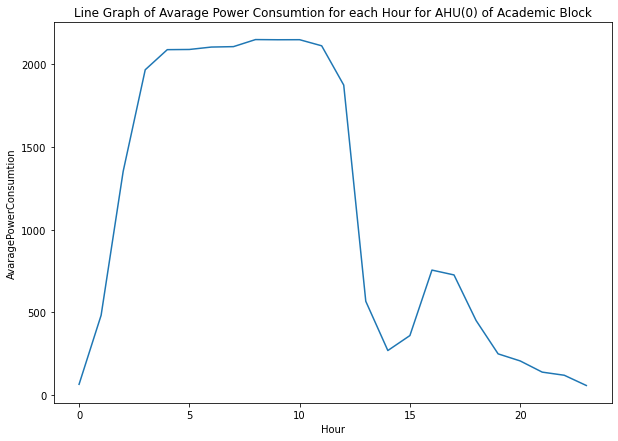

In [304]:

fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(df_aca_ahu0_avg_pow_con_hr.Hour,df_aca_ahu0_avg_pow_con_hr.Avg_Power_Hour)
ax.set(ylabel='AvaragePowerConsumtion', title = 'Line Graph of Avarage Power Consumtion for each Hour for AHU(0) of Academic Block')

In [305]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=df_aca_ahu0_avg_pow_con_hr,x='Hour',y='Avg_Power_Hour')
ax.set(ylabel='AvaragePowerConsumtion', title = 'Bar Chart of Avarage Power Consumtion for each Hour for AHU(0) of Academic Block')

[Text(0, 0.5, 'AvaragePowerConsumtion'),
 Text(0.5, 1.0, 'Bar Chart of Avarage Power Consumtion for each Hour for AHU(0) of Academic Block')]

[Text(0, 0.5, 'AvaragePowerConsumtion'),
 Text(0.5, 1.0, 'Avarage Power Consumtion for each Month for AHU(0) of Academic Block')]

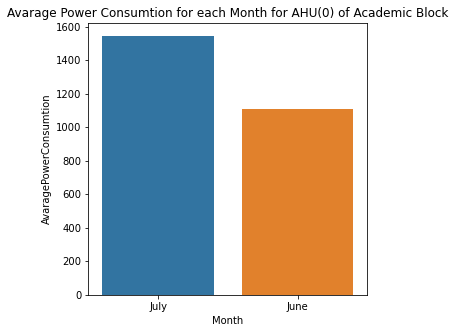

In [306]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df_aca_ahu0_power_consum_mon,x='Month',y='Avg_Power_Month')
ax.set(ylabel='AvaragePowerConsumtion', title = 'Avarage Power Consumtion for each Month for AHU(0) of Academic Block')

[Text(0, 0.5, 'AvaragePowerConsumtion'),
 Text(0.5, 1.0, 'Avarage Power Consumtion for each Day of Month for AHU(0) of Academic Block')]

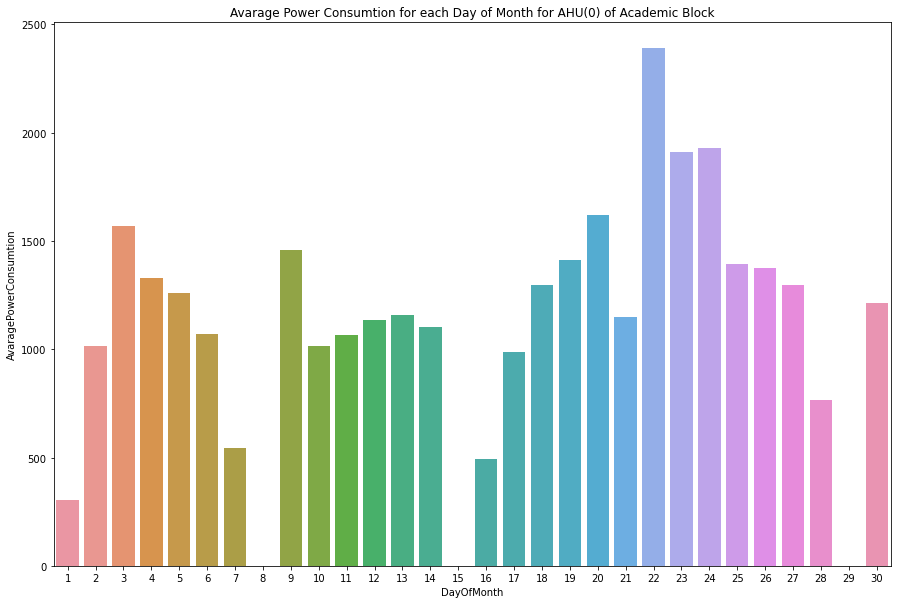

In [359]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df_aca_ahu0_power_consum_dayofmonth,x='DayOfMonth',y='Avg_Power_DayofMonth')
ax.set(ylabel='AvaragePowerConsumtion', title = 'Avarage Power Consumtion for each Day of Month for AHU(0) of Academic Block')

[Text(0, 0.5, 'AvaragePowerConsumtion'),
 Text(0.5, 1.0, 'Avarage Power Consumtion for each Day of Week for AHU(0) of Academic Block')]

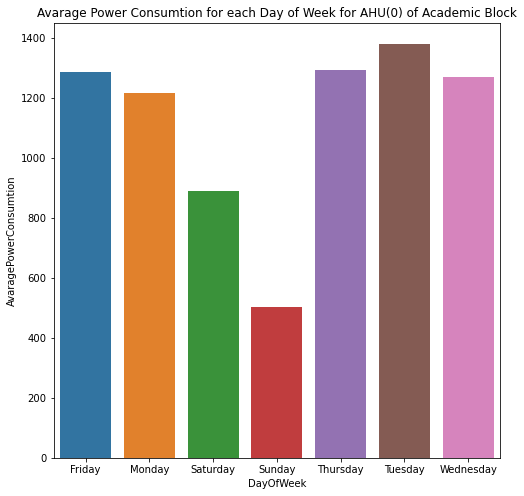

In [308]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_aca_ahu0_power_consum_dayofweek,x='DayOfWeek',y='Avg_Power_DayofWeek',)
ax.set(ylabel='AvaragePowerConsumtion', title = 'Avarage Power Consumtion for each Day of Week for AHU(0) of Academic Block')

In [350]:
fig, ax = plt.subplots(3,1,figsize=(10,8))
plt.suptitle('Comparison of Current, Energy and Power consumption in different hours of the day',fontsize="x-large",)
sns.lineplot(df_aca_ahu0_avg_pow_con_hr.Hour, df_aca_ahu0_avg_pow_con_hr.Avg_Current_Hour, label = "Current",ax=ax[0])
#plt.title('Comparison of Current, Energy and Power consumtion in different hours of the day')
sns.lineplot(df_aca_ahu0_avg_pow_con_hr.Hour, df_aca_ahu0_avg_pow_con_hr.Avg_Energy_Hour, label = "Energy",ax=ax[1])
sns.lineplot(df_aca_ahu0_avg_pow_con_hr.Hour, df_aca_ahu0_avg_pow_con_hr.Avg_Power_Hour, label = "Power",ax=ax[2])

E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Avg_Power_Hour'>

[Text(0.5, 1.0, 'Heatmap of all the attributes of the Dataset')]

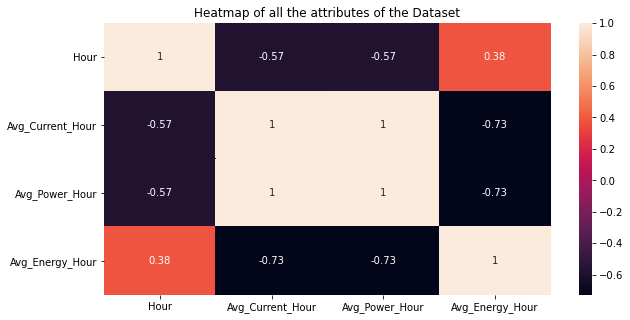

In [364]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df_aca_ahu0_avg_pow_con_hr.corr(),annot=True)
ax.set(title='Heatmap of all the attributes of the Dataset')

# Fetching and Analyzing data for Lecture Block-->AHU-->0

In [155]:
df_curr1 = pd.read_csv(r'iiitd\Lecture Block\AHU\0\Current.csv',encoding="cp1252")
df_pow1 = pd.read_csv(r'iiitd\Lecture Block\AHU\0\Power.csv',encoding="cp1252")
df_ener1 = pd.read_csv(r'iiitd\Lecture Block\AHU\0\Energy.csv',encoding="cp1252")

In [156]:
df_lec_ahu10,df_lec_ahu10_avg_pow_con_hr,df_lec_ahu10_power_consum_month,df_lec_ahu10_power_consum_dayofmonth,df_lec_ahu10_power_consum_dayofweek=prepare_dataset(df_curr1,df_pow1,df_ener1)

In [158]:
print('Max Current Consumption at Lecture block AHU(0):',df_lec_ahu10.Current.max(),'at',
     df_lec_ahu10[df_lec_ahu10.Current== df_lec_ahu10.Current.max()].Datetime.item())
print('Min Current Consumption at Lecture block AHU(0):',df_lec_ahu10.Current.min())
print('Mean Current Consumption at Lecture block AHU(0):',df_lec_ahu10.Current.mean())
print('Median of Current Consumption at Lecture block AHU(0):',df_lec_ahu10.Current.median(),'\n')

print('Max Power Consumption at Lecture block AHU(0):',df_lec_ahu10.Power.max(),'at',
     df_lec_ahu10[df_lec_ahu10.Power== df_lec_ahu10.Power.max()].Datetime.item())
print('Min Power Consumption at Lecture block AHU(0):',df_lec_ahu10.Power.min())
print('Mean Power Consumption at Lecture block AHU(0):',df_lec_ahu10.Power.mean())
print('Median of Power Consumption at Lecture block AHU(0):',df_lec_ahu10.Power.median(),'\n')

print('Max Energy Consumption at Lecture block AHU(0):',df_lec_ahu10.Energy.max())
print('Min Energy Consumption at Lecture block AHU(0):',df_lec_ahu10.Energy.min())
print('Mean Energy Consumption at Lecture block AHU(0):',df_lec_ahu10.Energy.mean())
print('Median of Energy Consumption at Lecture block AHU(0):',df_lec_ahu10.Energy.median())

Max Current Consumption at Lecture block AHU(0): 7.965205192565918 at 2014-06-06 06:47:37
Min Current Consumption at Lecture block AHU(0): 0.0
Mean Current Consumption at Lecture block AHU(0): 0.7226439835113802
Median of Current Consumption at Lecture block AHU(0): 2.000000132986441e-17 

Max Power Consumption at Lecture block AHU(0): 2984.92431640625 at 2014-06-06 06:33:07
Min Power Consumption at Lecture block AHU(0): 0.0
Mean Power Consumption at Lecture block AHU(0): 251.96503620798015
Median of Power Consumption at Lecture block AHU(0): 2.000000132986441e-17 

Max Energy Consumption at Lecture block AHU(0): 3071038.0
Min Energy Consumption at Lecture block AHU(0): 2896553.25
Mean Energy Consumption at Lecture block AHU(0): 3007466.624384697
Median of Energy Consumption at Lecture block AHU(0): 3012618.0


In [159]:
df_lec_ahu10_power_consum_month

Month  Avg_Current_Month  Avg_Power_Month  Avg_Energy_Month
0  July       2.000000e-17     2.000000e-17      3.071038e+06
1  June       7.268533e-01     2.534327e+02      3.007096e+06

# Comparing Avarage power consumptions in Academic and Lecture Block

In [160]:
df_combined_consumtion = df_lec_ahu10_power_consum_month.merge(df_aca_ahu0_power_consum_mon, on="Month", suffixes=["_Lecture", "_Academic"]).set_index("Month")
#df_combined_consumtion= df_combined_consumtion.astype(float)
df_combined_consumtion

Avg_Current_Month_Lecture  Avg_Power_Month_Lecture  \
Month                                                       
July                2.000000e-17             2.000000e-17   
June                7.268533e-01             2.534327e+02   

       Avg_Energy_Month_Lecture  Avg_Current_Month_Academic  \
Month                                                         
July               3.071038e+06                    2.851006   
June               3.007096e+06                    2.042863   

       Avg_Power_Month_Academic  Avg_Energy_Month_Academic  
Month                                                       
July                1543.852011               2.915575e+06  
June                1105.739694               2.496128e+06

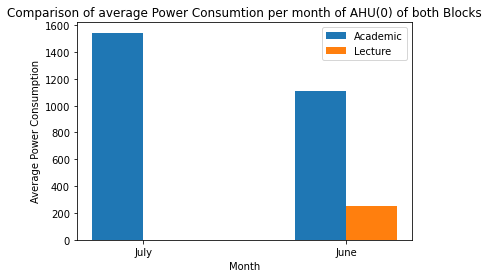

In [221]:
fig, ax = plt.subplots()
height = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion.Avg_Power_Month_Academic,height, label = 'Academic')
ax.bar(index+height,df_combined_consumtion.Avg_Power_Month_Lecture,height,label = 'Lecture')
ax.set_xticks(index + height / 2)
ax.set_xticklabels(df_combined_consumtion.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Power Consumption')
ax.set_title('Comparison of average Power Consumtion per month of AHU(0) of both Blocks')
ax.legend()

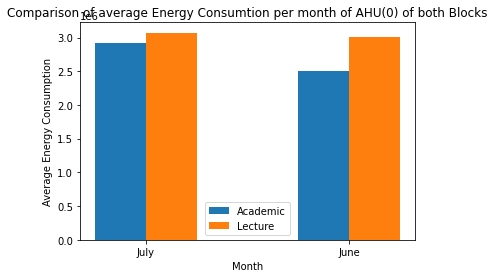

In [222]:
fig, ax = plt.subplots()
width = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion.Avg_Energy_Month_Academic,width, label = 'Academic')
ax.bar(index+height,df_combined_consumtion.Avg_Energy_Month_Lecture,width,label = 'Lecture')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df_combined_consumtion.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Energy Consumption')
ax.set_title('Comparison of average Energy Consumtion per month of AHU(0) of both Blocks')
ax.legend()

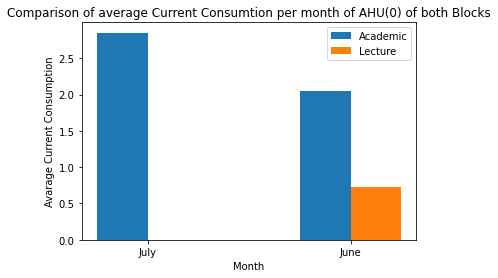

In [213]:

fig, ax = plt.subplots()
width = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion.Avg_Current_Month_Academic,width, label = 'Academic')
ax.bar(index+height,df_combined_consumtion.Avg_Current_Month_Lecture,width,label = 'Lecture')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df_combined_consumtion.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Current Consumption')
ax.set_title('Comparison of average Current Consumtion per month of AHU(0) of both Blocks')
ax.legend()

# Conclusion:
We can see that the Academic block(AHU(0)) has higher Power and Current consumption but less monthly Energy consumption than the Lecture block(AHU(0)). We will now see the comparisons of the overall Power consumptions in the First floor of both Academic and Lecture Block

In [214]:
df_curr_aca_fl1 = pd.read_csv(r'iiitd\Academic Block\Floor Total\1\Current.csv',encoding="cp1252")
df_pow2_aca_fl1 = pd.read_csv(r'iiitd\Academic Block\Floor Total\1\Power.csv',encoding="cp1252")
df_ener2_aca_fl1 = pd.read_csv(r'iiitd\Academic Block\Floor Total\1\Energy.csv',encoding="cp1252")
df_aca_fl1,df1_aca_fl1_avg_pow_con_hr,df_aca_fl1_power_consum_month,df_aca_fl1_power_consum_dayofmonth,df_aca_fl1_power_consum_dayofweek=prepare_dataset(df_curr_aca_fl1,df_pow2_aca_fl1,df_ener2_aca_fl1)

In [215]:
df_curr_lec_fl1 = pd.read_csv(r'iiitd\Lecture Block\Floor Total\1\Current.csv',encoding="cp1252")
df_pow2_lec_fl1 = pd.read_csv(r'iiitd\Lecture Block\Floor Total\1\Power.csv',encoding="cp1252")
df_ener2_lec_fl1 = pd.read_csv(r'iiitd\Lecture Block\Floor Total\1\Energy.csv',encoding="cp1252")
df_lec_fl1,df1_lec_fl1_avg_pow_con_hr,df_lec_fl1_power_consum_month,df_lec_fl1_power_consum_dayofmonth,df_lec_fl1_power_consum_dayofweek=prepare_dataset(df_curr_lec_fl1,df_pow2_lec_fl1,df_ener2_lec_fl1)

In [216]:
df_combined_consumtion_fl1 = df_lec_fl1_power_consum_month.merge(df_aca_fl1_power_consum_month, on="Month", suffixes=["_Lecture", "_Academic"]).set_index("Month")
#df_combined_consumtion= df_combined_consumtion.astype(float)
df_combined_consumtion_fl1

Avg_Current_Month_Lecture  Avg_Power_Month_Lecture  \
Month                                                       
July                    0.500050               251.627406   
June                    0.938812               607.837827   

       Avg_Energy_Month_Lecture  Avg_Current_Month_Academic  \
Month                                                         
July               5.960711e+06                    7.375238   
June               5.741091e+06                    9.442259   

       Avg_Power_Month_Academic  Avg_Energy_Month_Academic  
Month                                                       
July                4866.662676               3.662028e+07  
June                6423.356738               3.428773e+07

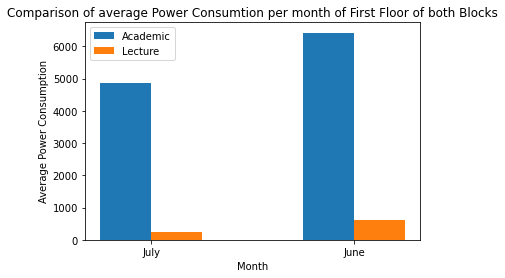

In [217]:
fig, ax = plt.subplots()
width = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion_fl1.Avg_Power_Month_Academic,width, label = 'Academic')
ax.bar(index+height,df_combined_consumtion_fl1.Avg_Power_Month_Lecture,width,label = 'Lecture')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df_combined_consumtion_fl1.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Power Consumption')
ax.set_title('Comparison of average Power Consumtion per month of First Floor of both Blocks')
ax.legend()

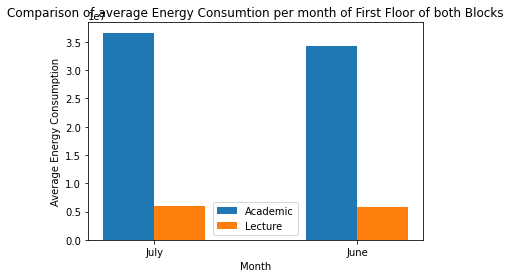

In [218]:
fig, ax = plt.subplots()
width = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion_fl1.Avg_Energy_Month_Academic,width, label = 'Academic')
ax.bar(index+height,df_combined_consumtion_fl1.Avg_Energy_Month_Lecture,width,label = 'Lecture')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df_combined_consumtion_fl1.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Energy Consumption')
ax.set_title('Comparison of average Energy Consumtion per month of First Floor of both Blocks')
ax.legend()

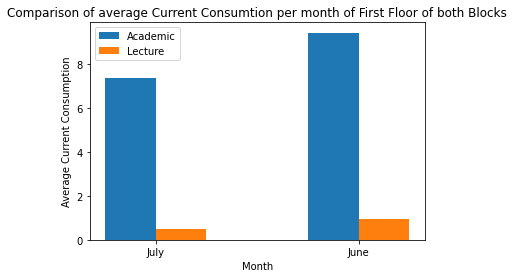

In [220]:
fig, ax = plt.subplots()
width = 0.25
index = np.arange(2)
ax.bar(index,df_combined_consumtion_fl1.Avg_Current_Month_Academic,width, label = 'Academic')
ax.bar(index+height,df_combined_consumtion_fl1.Avg_Current_Month_Lecture,width,label = 'Lecture')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df_combined_consumtion_fl1.index)
ax.set_xlabel('Month')
ax.set_ylabel('Average Current Consumption')
ax.set_title('Comparison of average Current Consumtion per month of First Floor of both Blocks')
ax.legend()

# So from the above plots we can see that the Floor 1 in Academic block has much more average monthly Power, Energy and Current consumption than Floor 1 in Lecture Block

# Building model for Academic Block-->AHU-->0 (Considering Datetime, Current and Energy as known Parameter as Power as target variable)

In [188]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from math import sqrt

Using MinMax Scaler to scale the data and change the datatype of Datetime column

In [284]:
df_aca_ahu0_model = df_aca_ahu0.copy()
df_aca_ahu0_model['Datetime'] = pd.to_numeric(pd.to_datetime(df_aca_ahu0_model['Datetime']))
scaler = MinMaxScaler()
df_aca_ahu0_model[['Current','Energy','Power']] = pd.DataFrame(scaler.fit_transform(df_aca_ahu0_model[['Current','Energy','Power']]))
#print(df_aca_ahu0.dtypes)


In [285]:
X=df_aca_ahu0_model[['Datetime','Current','Energy']]
y=df_aca_ahu0_model.Power

In [286]:
# Split the data in Train : Test :: 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [287]:
print(X_train.dtypes)
regressor = LinearRegression().fit(X_train,y_train)
y_predict = regressor.predict(X_test)

Datetime      int64
Current     float64
Energy      float64
dtype: object


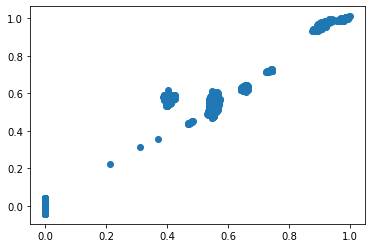

In [288]:
plt.scatter(y_test, y_predict)

In [289]:
k = X_test.shape[1]
n = len(X_test)
RMSE = round(sqrt(mean_squared_error(y_test, y_predict)),3)
MSE = round(mean_squared_error(y_test, y_predict),3)
MAE = round(mean_absolute_error(y_test, y_predict),3)
r2 = round(r2_score(y_test, y_predict),3)
adj_r2 = round(1 - (1-r2) * (len(y_test)-1)/(len(y_test)-k-1),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.034 
MSE = 0.001 
MAE = 0.025 
R2 = 0.986 
Adjusted R2 = 0.986


# Validating the model with Academic Block-->AHU-->1 data

In [277]:
df_curr2 = pd.read_csv(r'iiitd\Academic Block\AHU\1\Current.csv',encoding="cp1252")
df_pow2 = pd.read_csv(r'iiitd\Academic Block\AHU\1\Power.csv',encoding="cp1252")
df_ener2 = pd.read_csv(r'iiitd\Academic Block\AHU\1\Energy.csv',encoding="cp1252")
df_aca_ahu1,df_aca_ahu1_avg_pow_con_hr,df_aca_ahu1_power_consum_mon, df_aca_ahu1_power_consum_dayofmonth,df_aca_ahu1_power_consum_dayofweek=prepare_dataset(df_curr2,df_pow2,df_ener2)

Using MinMax Scaler to scale the data and change the datatype of Datetime column

In [290]:
df_aca_ahu1_model = df_aca_ahu1.copy()
df_aca_ahu1_model['Datetime'] = pd.to_numeric(pd.to_datetime(df_aca_ahu1_model['Datetime']))
print(df_aca_ahu1_model.dtypes)
df_aca_ahu1_model[['Current','Energy','Power']] = pd.DataFrame(scaler.fit_transform(df_aca_ahu1_model[['Current','Energy','Power']]))
X_validate=df_aca_ahu1_model[['Datetime','Current','Energy']]
X_validate1= df_aca_ahu1_model[['Datetime']]
y_validate=df_aca_ahu1_model.Power

Datetime      int64
Current     float64
Power       float64
Energy      float64
dtype: object


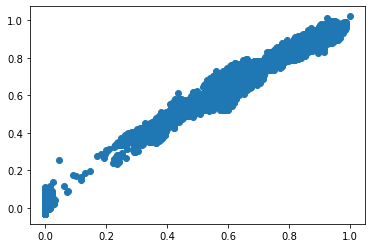

In [291]:
y_predict1 = regressor.predict(X_validate)
plt.scatter(y_validate, y_predict1)

In [292]:
k = X_validate.shape[1]
n = len(X_validate)
RMSE = round(sqrt(mean_squared_error(y_validate, y_predict1)),3)
MSE = round(mean_squared_error(y_validate, y_predict1),3)
MAE = round(mean_absolute_error(y_validate, y_predict1),3)
r2 = round(r2_score(y_validate, y_predict1),3)
adj_r2 = round(1 - (1-r2) * (len(y_validate)-1)/(len(y_validate)-k-1),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.041 
MSE = 0.002 
MAE = 0.032 
R2 = 0.986 
Adjusted R2 = 0.986


# Building Model Considering Datetime is the only known parameter and Energy as the target variable

Testing using train test in 80:20 Ratio

In [295]:
from sklearn.linear_model import Lasso
X1=df_aca_ahu0_model[['Datetime']]
y1=df_aca_ahu0_model.Power
# Split the data in Train : Test :: 80 : 20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)
regressor1 = Lasso().fit(X_train1,y_train1)
y_predict1 = regressor1.predict(X_test1)
k = X_test1.shape[1]
n = len(X_test1)
RMSE = round(sqrt(mean_squared_error(y_test1, y_predict1)),3)
MSE = round(mean_squared_error(y_test1, y_predict1),3)
MAE = round(mean_absolute_error(y_test1, y_predict1),3)
r2 = round(r2_score(y_test1, y_predict1),3)
adj_r2 = round(1 - (1-r2) * (len(y_test1)-1)/(len(y_test1)-k-1),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.291 
MSE = 0.085 
MAE = 0.282 
R2 = 0.007 
Adjusted R2 = 0.007


Validating with the AHU --> 1 data of Academic block

In [297]:
X_validate1= df_aca_ahu1_model[['Datetime']]
y_validate1=df_aca_ahu1_model.Power
y_predict2 = regressor1.predict(X_validate1)
k = X_validate1.shape[1]
n = len(X_validate1)
RMSE = round(sqrt(mean_squared_error(y_validate1, y_predict2)),3)
MSE = round(mean_squared_error(y_validate1, y_predict2),3)
MAE = round(mean_absolute_error(y_validate1, y_predict2),3)
r2 = round(r2_score(y_validate1, y_predict2),3)
adj_r2 = round(1 - (1-r2) * (len(y_validate1)-1)/(len(y_validate1)-k-1),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.34 
MSE = 0.115 
MAE = 0.309 
R2 = 0.009 
Adjusted R2 = 0.009
